In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df_summary = None
models = ['llama-3-8B-Instruct', 'llama-3.1-8B-Instruct', 'Qwen1.5-7B-Chat', 'Qwen1.5-7B-Chat-AWQ', 'Qwen2-7B-Instruct', 'Qwen1.5-14B-Chat']
for model in models:
    df = pd.read_csv(f'./{model}/results.csv')
    df['model'] = model
    if df_summary is None:
        df_summary = df
    else:
        df_summary = pd.concat([df_summary, df], ignore_index=True)

df_summary['bits'] = df_summary['method'].apply(lambda x: 16 if '_' not in x else x.split('_')[1])
df_summary['residual length'] = df_summary['method'].apply(lambda x: 0 if '_' not in x else x.split('_')[2])
df_summary['method'] = df_summary['method'].apply(lambda x: x if '_' not in x else x.split('_')[0])
#drop bits == 4
df_summary = df_summary[df_summary['bits'] != '4']
df_summary.to_csv('summary.csv', index=False)

In [20]:
df_summary_logquant = df_summary[df_summary['method'].isin(['baseline', 'KiVi', 'LogQuant', 'PartialLogQuant'])]
df_summary_logquant.to_csv('summary_logquant.csv', index=False)

In [21]:
categories = {
    "Single-Document QA": ["narrativeqa", "qasper", "multifieldqa_en", "multifieldqa_zh"],
    "Multi-Document QA": ["hotpotqa", "2wikimqa", "musique", "dureader"],
    "Summarization": ["gov_report", "qmsum", "multi_news", "vcsum"],
    "Few-shot Learning": ["trec", "triviaqa", "samsum", "lsht"],
    "Synthetic Tasks": ["passage_count", "passage_retrieval_en", "passage_retrieval_zh"],
    "Code Completion": ["lcc", "repobench-p"]
}

df_summary_logquant_task_group = df_summary_logquant
df_summary_logquant_task_group['task_group'] = df_summary_logquant_task_group['task'].apply(lambda x: [k for k, v in categories.items() if x in v][0])
df_summary_logquant_task_group = df_summary_logquant_task_group[df_summary_logquant_task_group['model'].isin(['llama-3.1-8B-Instruct', 'Qwen1.5-7B-Chat', 'Qwen1.5-7B-Chat-AWQ', 'Qwen2-7B-Instruct'])]
df_summary_logquant_task_group = df_summary_logquant_task_group[df_summary_logquant_task_group['residual length'].isin([0, '128'])]
#df_summary_logquant_task_group.to_csv('summary_logquant_task_group.csv', index=False)
df_summary_logquant_task_group

/tmp/ipykernel_10491/2278797323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_logquant_task_group['task_group'] = df_summary_logquant_task_group['task'].apply(lambda x: [k for k, v in categories.items() if x in v][0])


,task,score,model,method,bits,residual length,task_group
588,2wikimqa,45.06,llama-3.1-8B-Instruct,baseline,16,0,Multi-Document QA
589,dureader,28.48,llama-3.1-8B-Instruct,baseline,16,0,Multi-Document QA
590,gov_report,20.41,llama-3.1-8B-Instruct,baseline,16,0,Summarization
591,hotpotqa,55.90,llama-3.1-8B-Instruct,baseline,16,0,Multi-Document QA
592,lcc,62.99,llama-3.1-8B-Instruct,baseline,16,0,Code Completion
...,...,...,...,...,...,...,...
2011,repobench-p,47.19,Qwen2-7B-Instruct,PartialLogQuant,2,128,Code Completion
2012,samsum,26.77,Qwen2-7B-Instruct,PartialLogQuant,2,128,Few-shot Learning
2013,trec,68.00,Qwen2-7B-Instruct,PartialLogQuant,2,128,Few-shot Learning
2014,triviaqa,81.15,Qwen2-7B-Instruct,PartialLogQuant,2,128,Few-shot Learning


In [22]:
df_cmp = pd.concat([df_summary_logquant_task_group[(df_summary_logquant_task_group['method'] == 'LogQuant') & (df_summary_logquant_task_group['residual length'] == '192')], df_summary_logquant_task_group[(df_summary_logquant_task_group['method'] == 'PartialLogQuant') & (df_summary_logquant_task_group['residual length'] == '128')], df_summary_logquant_task_group[(df_summary_logquant_task_group['method'] == 'KiVi') & (df_summary_logquant_task_group['residual length'] == '192')]])
df_cmp


,task,score,model,method,bits,residual length,task_group
861,2wikimqa,39.61,llama-3.1-8B-Instruct,PartialLogQuant,2,128,Multi-Document QA
862,dureader,22.63,llama-3.1-8B-Instruct,PartialLogQuant,2,128,Multi-Document QA
863,gov_report,18.96,llama-3.1-8B-Instruct,PartialLogQuant,2,128,Summarization
864,hotpotqa,52.06,llama-3.1-8B-Instruct,PartialLogQuant,2,128,Multi-Document QA
865,lcc,57.55,llama-3.1-8B-Instruct,PartialLogQuant,2,128,Code Completion
...,...,...,...,...,...,...,...
2011,repobench-p,47.19,Qwen2-7B-Instruct,PartialLogQuant,2,128,Code Completion
2012,samsum,26.77,Qwen2-7B-Instruct,PartialLogQuant,2,128,Few-shot Learning
2013,trec,68.00,Qwen2-7B-Instruct,PartialLogQuant,2,128,Few-shot Learning
2014,triviaqa,81.15,Qwen2-7B-Instruct,PartialLogQuant,2,128,Few-shot Learning


<Axes: xlabel='task', ylabel='score'>

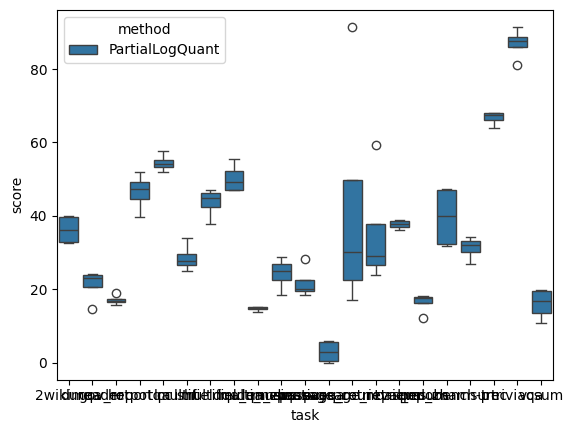

In [23]:
sns.boxplot(data=df_cmp, x='task', y='score', hue='method')

In [24]:
df_task_group_avg = df_summary_logquant_task_group[['task_group', 'model', 'method', 'bits', 'residual length', 'score']].groupby(['task_group', 'model', 'method', 'bits', 'residual length']).mean().reset_index()
df_task_group_avg = df_task_group_avg[df_task_group_avg['model'].isin(['llama-3.1-8B-Instruct', 'Qwen1.5-7B-Chat', 'Qwen1.5-7B-Chat-AWQ', 'Qwen2-7B-Instruct'])]
df_task_group_avg = df_task_group_avg[df_task_group_avg['residual length'].isin([0, '128'])]
df_task_group_avg.to_csv('task_group_avg.csv', index=False)

In [26]:
df_task_group_avg[df_task_group_avg['model'] == 'Qwen2-7B-Instruct'].to_csv('task_group_avg_qwen2.csv', index=False)

In [10]:
model_name = 'Qwen2-7B-Instruct'
df = pd.read_csv(f'./{model_name}/results.csv')
df

,task,score,model,method
0,2wikimqa,44.15,Qwen2-7B-Instruct,baseline
1,dureader,19.22,Qwen2-7B-Instruct,baseline
2,gov_report,18.09,Qwen2-7B-Instruct,baseline
3,hotpotqa,44.30,Qwen2-7B-Instruct,baseline
4,lcc,57.72,Qwen2-7B-Instruct,baseline
...,...,...,...,...
256,repobench-p,46.46,Qwen2-7B-Instruct,StreamingQuant_2_256
257,samsum,27.91,Qwen2-7B-Instruct,StreamingQuant_2_256
258,trec,69.00,Qwen2-7B-Instruct,StreamingQuant_2_256
259,triviaqa,82.82,Qwen2-7B-Instruct,StreamingQuant_2_256


In [3]:
df = pd.read_csv(f'./{model_name}/results.csv')
df = pd.concat([df[df['method'].str.contains('_2_128')], df[df['method'] == 'baseline']], axis=0)
df['method'] = df['method'].str.replace('_2_128', '')
df

,task,score,model,method
21,2wikimqa,11.33,Qwen2-7B-Instruct,KiVi
22,dureader,13.08,Qwen2-7B-Instruct,KiVi
23,gov_report,10.82,Qwen2-7B-Instruct,KiVi
24,hotpotqa,17.39,Qwen2-7B-Instruct,KiVi
25,lcc,36.63,Qwen2-7B-Instruct,KiVi
...,...,...,...,...
16,repobench-p,58.74,Qwen2-7B-Instruct,baseline
17,samsum,35.94,Qwen2-7B-Instruct,baseline
18,trec,78.00,Qwen2-7B-Instruct,baseline
19,triviaqa,89.66,Qwen2-7B-Instruct,baseline


In [4]:
df = df[df['method'].isin(['baseline', 'KiVi', 'LogQuant', 'PartialLogQuant'])]
df['method'] = df['method'].replace('LogQuant', 'LogQuant (ours)')
df['method'] = df['method'].replace('PartialLogQuant', 'PartialLogQuant (ours)')
df['method'] = df['method'].replace('baseline', 'Baseline(BF16)')

/tmp/ipykernel_5836/355479241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['method'] = df['method'].replace('LogQuant', 'LogQuant (ours)')
/tmp/ipykernel_5836/355479241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['method'] = df['method'].replace('PartialLogQuant', 'PartialLogQuant (ours)')
/tmp/ipykernel_5836/355479241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [5]:
categories = {
    "Single-Document QA": ["narrativeqa", "qasper", "multifieldqa_en", "multifieldqa_zh"],
    "Multi-Document QA": ["hotpotqa", "2wikimqa", "musique", "dureader"],
    "Summarization": ["gov_report", "qmsum", "multi_news", "vcsum"],
    "Few-shot Learning": ["trec", "triviaqa", "samsum", "lsht"],
    "Synthetic Tasks": ["passage_count", "passage_retrieval_en", "passage_retrieval_zh"],
    "Code Completion": ["lcc", "repobench-p"]
}

tasks = 0
for category, task_list in categories.items():
    tasks += len(task_list)
    print(f"{category}: {len(task_list)} tasks")
print(f"Total: {tasks} tasks")

Single-Document QA: 4 tasks
Multi-Document QA: 4 tasks
Summarization: 4 tasks
Few-shot Learning: 4 tasks
Synthetic Tasks: 3 tasks
Code Completion: 2 tasks
Total: 21 tasks


/tmp/ipykernel_5836/2199002473.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
/tmp/ipykernel_5836/2199002473.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
/tmp/ipykernel_5836/2199002473.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
/tmp/ipykernel_5836/2199002473.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
/tmp/ipykernel_5836/2199002473.py:12: UserWarning: set_tickl

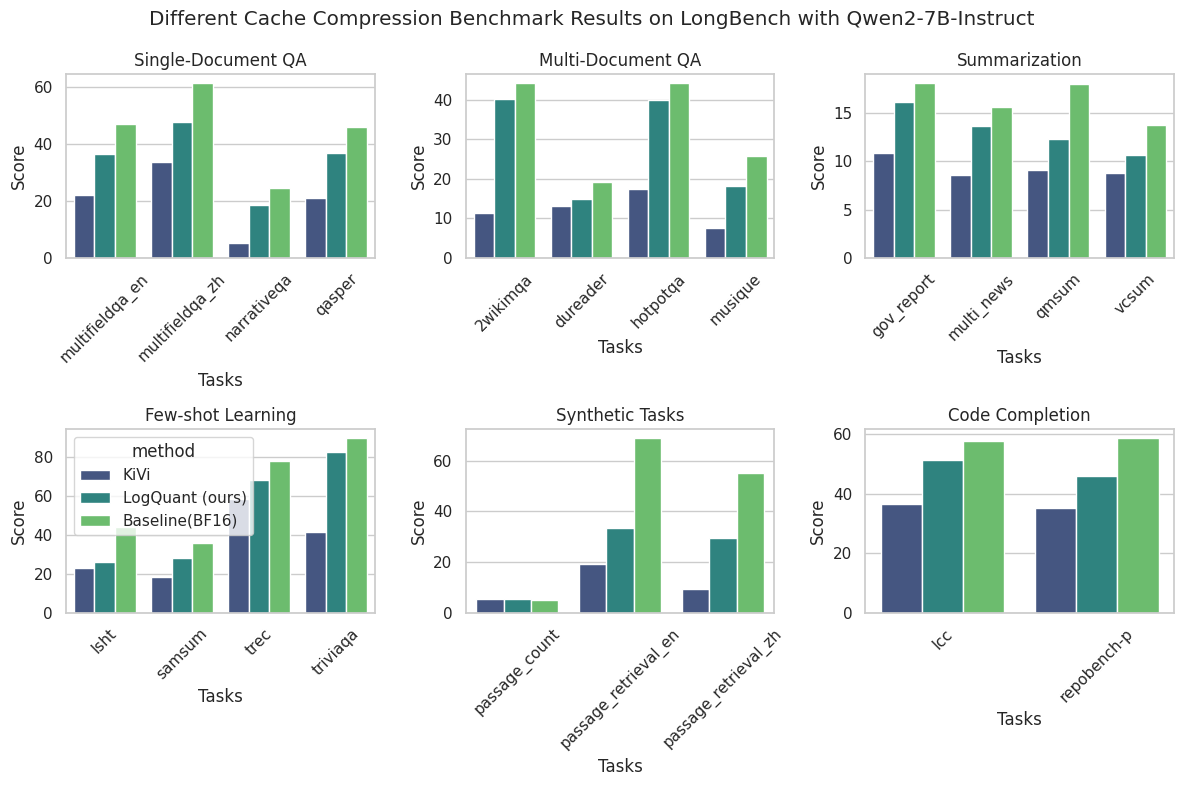

In [10]:
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle(f'Different Cache Compression Benchmark Results on LongBench with {model_name}')
#set color palette by tab10, but turn KiVi into dark color, the rest into light color
colors = sns.color_palette("viridis", 3)
#colors[0] = (0.3, 0.2, 0.1)
sns.set_palette(colors)
for i, (category, task_list) in enumerate(categories.items()):
    ax = axs[i // 3, i % 3]
    ax.set_title(category)
    sns.barplot(x='task', y='score', hue='method', data=df[df['task'].isin(task_list)], ax=ax, palette=colors)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
    ax.set_ylabel('Score')
    ax.set_xlabel('Tasks')
    if i != 3:
        ax.get_legend().remove()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig(f'./{model_name}/results.png')
plt.show()


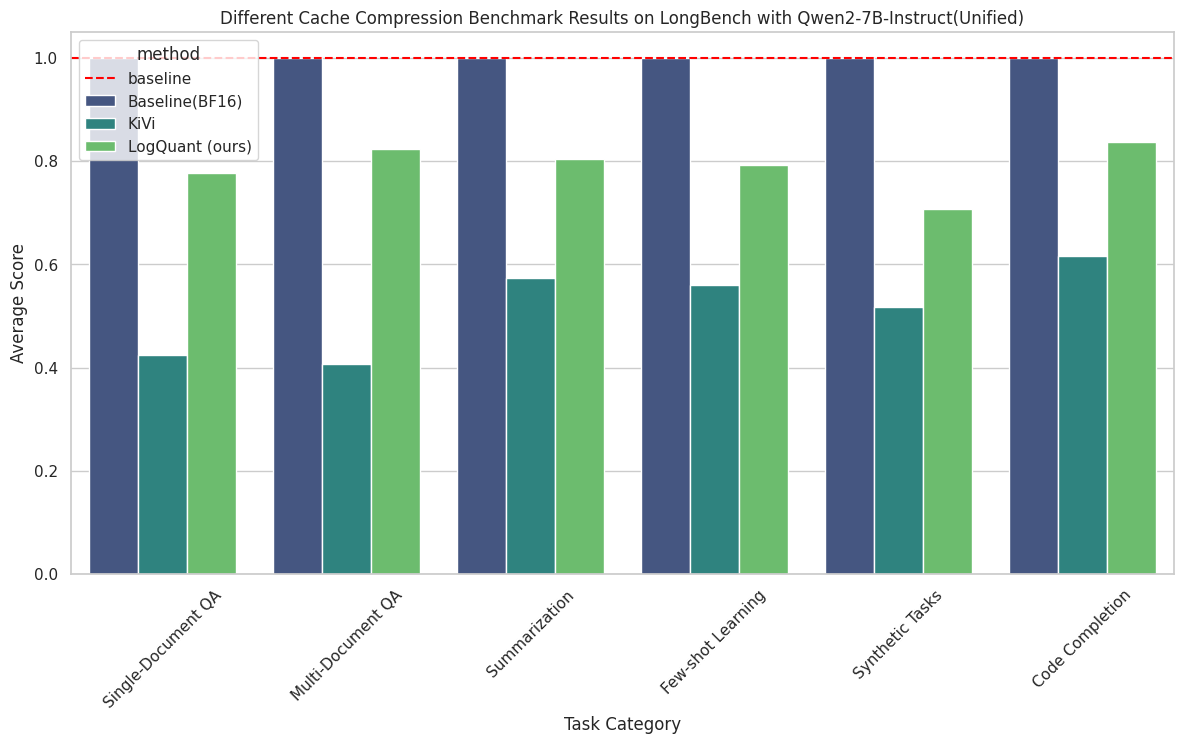

In [11]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.set_palette(colors)
fig.suptitle(f'Different Cache Compression Benchmark Results on LongBench with {model_name}(Unified)')
df_task_category = None
for i, (category, task_list) in enumerate(categories.items()):
    df_tmp = df[df['task'].isin(task_list)]
    tasks_tmp = df_tmp['task'].unique()
    for task in tasks_tmp:
        baseline_score = df_tmp[(df_tmp['task'] == task) & (df_tmp['method'] == 'Baseline(BF16)')]['score'].values[0]
        for method in df_tmp['method'].unique():
            df_tmp.loc[(df_tmp['task'] == task) & (df_tmp['method'] == method), 'score'] /= baseline_score
    df_tmp_avg = df_tmp[['score', 'method']].groupby('method').mean().reset_index()
    df_tmp_avg['task'] = category
    if df_task_category is None:
        df_task_category = df_tmp_avg
    else:
        df_task_category = pd.concat([df_task_category, df_tmp_avg], axis=0, ignore_index=True)

df_task_category = df_task_category[df_task_category['method'] != 'baseline']
#draw the baseline at y=1
plt.axhline(y=1, color='red', linestyle='--', label='baseline')
sns.barplot(x='task', y='score', hue='method', data=df_task_category)
plt.ylabel('Average Score')
plt.xlabel('Task Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.title(f'Different Cache Compression Benchmark Results on LongBench with {model_name}(Unified)')
plt.savefig(f'{model_name}/results_tasks_unified.png', dpi=600)